In [1]:
#1 phase portrait (cuiver in matplotlib), trajectories and draw conlclusion
#2 on network
#3 change in procedure
# for every task prepare brief conclusions from obtained results (IMPORTANT)

In [24]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import imageio.v2 as imageio
import os

In [2]:
# Graphs from previous lists, small enhancements

#There will be Erdos-Renyi model, for graph with fixed number of links L between N nodes 
def Ernyi(N=20, L=20):
    if(L>N*(N-1)/2):
        raise ValueError ("To many edges!") # of course we cannot create matrix of 3 nodes with 4 edges
    G = nx.Graph()
    G.add_nodes_from([i for i in range(N)]) #so we can start from 1
    iterator = 0
    while(iterator<L):
        [i,j] = random.sample(list(G.nodes), 2) #we take two nodes
        if not((i, j) in G.edges):
            G.add_edge(i, j) #we add
        else: #to maintain proper number of links
            iterator = iterator-1 
        iterator = iterator + 1
    
    return G

#N is number of nodes, k is number of closest neighbours and p is probability that we change edge in single step
def Watatz(N=20, k=4, p=1):
    if(k%2==1):
        raise ValueError ("Need even number of closest neighbours!")
    
    #creates starting graph//do not move
    G = nx.Graph()
    G.add_nodes_from([i for i in range(N)])
    for i in G.nodes:
        for ki in range(int(k/2)):
            G.add_edges_from([((i+N-1-ki)%N,i), ((i+N+1+ki)%N,i)]) #calculations so N-1 is connected with 0
    
    #changes link for each
    new_G = nx.Graph()
    new_G.add_nodes_from(list(G.nodes))
    iterator = 0

    for link in G.edges:
        #relinking
        if(random.random()<p): #if we succeed in relinking
            new_link = link #for now it is as before
            if(random.random()<0.5): #whether relink node 1 or 2 from edge
                #we do not want link that already was in network, not that we have in currently created one
                while(new_link in list(G.edges)[iterator:] or new_link in new_G.edges):
                    for_choice = list(G.nodes)
                    for_choice.remove(new_link[0])
                    relink = random.choice(for_choice)
                    new_link = (new_link[0], relink)
                new_G.add_edge(new_link[0], new_link[1])
            else: #same procedure, but we change second end of edge
                while(new_link in list(G.edges)[iterator:] or new_link in new_G.edges):
                    for_choice = list(G.nodes)
                    for_choice.remove(new_link[1])
                    relink = random.choice(for_choice)
                    new_link = (relink, new_link[1])
                new_G.add_edge(new_link[0], new_link[1])
        else: #we simply add link that existed in starting network
            new_G.add_edge(link[0], link[1])
        iterator = iterator+1
        
    #new_G.add_nodes_from(list(G.nodes)) #in case some node got totally unconnected
    
    return new_G

''' we start with m0 nodes and in each step we add node connected to m<m0 previous nodes until we reach N nodes
    after t steps we should have N=m0+t nodes and E=m0+mt edges
'''
def Barabasi(m0, m, t):
    '''creating, start from 1 to be similar with previous ones
        we want to start with m0 nodes, m0 edges and each link connected,
        so I just start with triangle, then add new linked nodes'''
    
    G = nx.Graph()
    G.add_edges_from([(0,1), (0,2), (1,2)])
    for i in range(2,m0): 
        G.add_edge(i, random.choice(list(G.nodes)))
        
    #now we add new nodes, choose m distinct edges coming from new node
    for tau in range(t):
        pi = [nx.degree(G, nody)/(sum([nx.degree(G, n) for n in G.nodes])) for nody in G.nodes] #probability for each node
        choice_list =  np.random.choice(list(G.nodes), m, p=pi, replace=False) #choose randomly with no repetinions
        
        for link in choice_list:
            G.add_edge(link, tau+m0)
         #in case we do not link it to any node
      
    return G

In [5]:
-math.log(random.uniform(0.0,1.0))

2.3360360884470466

In [8]:
random.uniform(0.0,1.0)

0.8089941952022582

# Task 1

In [40]:
# testing parameters, later fix N and play with beta and r to check R_0
N = 100
dt = 1
beta = 0.05
r = 0.5
#SIR - [N-1, 1, 0] at start
#such parameters should give us epidemic
n_I = 1 #number of infected
n_S = N- n_I #number of sucseptibles
n_R = 0

In [41]:
t = 0
T = 100 # time horizon
SIR = []
SIR.append((t, n_S, n_I, n_R))

In [42]:
print(t, n_S, n_I, n_R)

0 99 1 0


In [43]:
#kecture thing
while(t<T):
    if n_I == 0:
        break
    infected = beta*n_S*n_I
    recovered = r*n_I
    
    changed_status = infected + recovered
    t += random.random() 
    
    if(random.random()<infected/changed_status):
        
        n_S -= 1
        n_I += 1
    else:
        n_I -= 1
        n_R += 1
    
    
    SIR.append((t, n_S, n_I, n_R))
new_SIR = np.array(SIR)

Text(0, 0.5, 'Number of people')

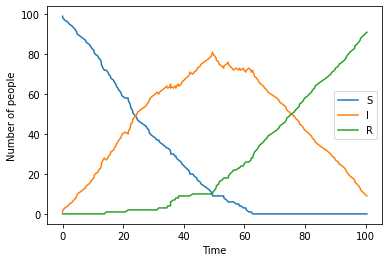

In [44]:
plt.plot(new_SIR[:,0], new_SIR[:,1], label = "S")
plt.plot(new_SIR[:,0], new_SIR[:,2], label = "I")
plt.plot(new_SIR[:,0], new_SIR[:,3], label = "R")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of people')
#plt.xlim(0,11)

In [45]:
#???
while(t<T):
    if n_I == 0:
        break
    infected = beta*n_S*n_I
    recovered = r*n_I
    
    #changed_status = infected + recovered
    t += dt 
    
    n_S -= infected
    n_I += infected-recovered
    n_R += recovered
    
    
    SIR.append((t, n_S, n_I, n_R))
new_SIR = np.array(SIR)

In [124]:
def lat(rows=4, columns=4):
    G = nx.Graph()
    nodes = [i for i in range(rows*columns)]
    for i in (1, rows-1):
        G.add_edges_from([(i-1, i), (i, i+1)])
    for j in (1, columns-1):
        G.add_edges_from([(j-1, j), (j, j+1)])
    return G

1 2 3 4 

5 6 7 8 

9 10 11 12

Tak to ma wyglądać


# Task 2

In [48]:
D = nx.grid_2d_graph(4,5)

In [49]:
D.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4)))

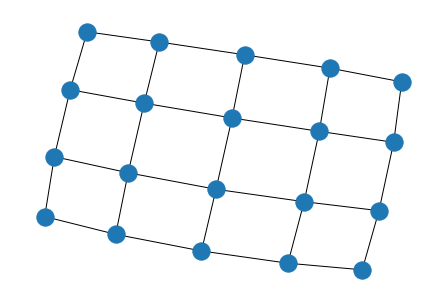

In [50]:
nx.draw(D)

a)

In [3]:
#już działa
def p_walk(G, p=0.5):
    '''For a graph G starts from a random node SIR model
    returns how much infected we have in each step
    '''
    
    tim = time.time()
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[p0] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    
    nodes_moved = 0
    while(np.prod(node_status)==0):
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            nodes_moved +=1
            if node_status[node]== 0:
                future_status[node] = -1
                for n in G.neighbors(node):
                    if(node_status[n] == 1 and random.random()<p):
                        future_status[n] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               
    print('Time needed', time.time()-tim)

    return infection_progress 

In [9]:
G_r = Ernyi(100, 500)
G_w = Watatz(100, 4, 0.5)
G_b = Barabasi(3, 3, 97)

Time needed 0.0010008811950683594
1.0


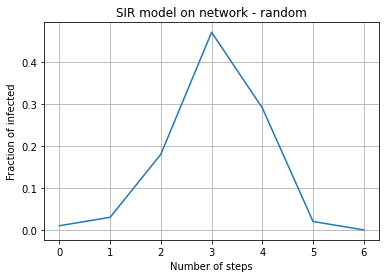

In [5]:
t = p_walk(G_r, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - random')
print(sum(t))
plt.grid()

Time needed 0.0010006427764892578
0.7700000000000001


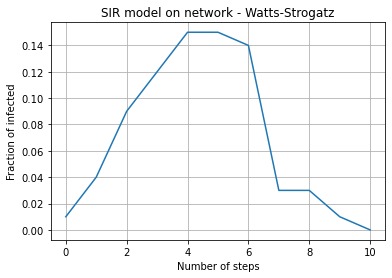

In [110]:
t = p_walk(G_w, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - Watts-Strogatz')
print(sum(t))
plt.grid()

Time needed 0.0
0.02


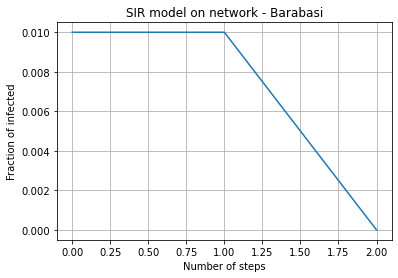

In [111]:
t = p_walk(G_b, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - Barabasi')
print(sum(t))
plt.grid()

b) for 3 different p plot mean fraction of infected

In [4]:
def SIR_walk(G, starting_node, p=0.5):
    '''Similar as previous function, but we start from given node
    '''
    
    tim = time.time()
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    
    node_status[starting_node] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    
    nodes_moved = 0
    while(np.prod(node_status)==0):
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            nodes_moved +=1
            if node_status[node]== 0:
                future_status[node] = -1
                for n in G.neighbors(node):
                    if(node_status[n] == 1 and random.random()<p):
                        future_status[n] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               

    return infection_progress 

In [5]:
def my_counter(t_list):
    '''returns mean of lists differing in length of row
    '''
    #columns may differ in length, so I want to sum up them
    my_len = len(t_list)
    
    current_max = 0 
    for run in t_list:
        current_max = max(current_max, len(run))
    for i in range(my_len):
        t_list[i].extend(np.zeros(current_max-len(t_list[i])))
    
    time_sets = np.zeros(current_max)
    for i in range(current_max):
        for j in range(my_len):
            time_sets[i]+=t_list[j][i]
    #print(time_sets/my_len)
    return time_sets/my_len

In [8]:
p1 = 0.2
p2 = 0.4
p3 = 0.5
start_node = 2

#### p1 = 0.2

In [138]:
r_p1 = []
for i in range(1000):
    r_p1.append(SIR_walk(G_r, start_node, p1))
    
w_p1 = []
for i in range(1000):
    w_p1.append(SIR_walk(G_w, start_node, p1))
    
b_p1 = []
for i in range(1000):
    b_p1.append(SIR_walk(G_b, start_node, p1))

In [139]:
r_t1 = my_counter(r_p1)
w_t1 = my_counter(w_p1)
b_t1 = my_counter(b_p1)

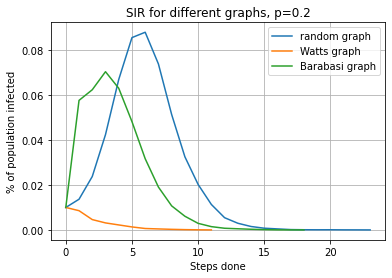

In [140]:
plt.plot(r_t1, label='random graph')
plt.plot(w_t1, label='Watts graph')
plt.plot(b_t1, label='Barabasi graph')
plt.title('SIR for different graphs, p=0.2')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

#### p2 = 0.4

In [136]:
r_p2 = []
for i in range(1000):
    r_p2.append(SIR_walk(G_r, start_node, p2))
    
w_p2 = []
for i in range(1000):
    w_p2.append(SIR_walk(G_w, start_node, p2))
    
b_p2 = []
for i in range(1000):
    b_p2.append(SIR_walk(G_b, start_node, p2))
    
r_t2 = my_counter(r_p2)
w_t2 = my_counter(w_p2)
b_t2 = my_counter(b_p2)

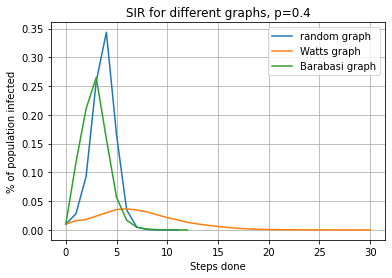

In [137]:
plt.plot(r_t2, label='random graph')
plt.plot(w_t2, label='Watts graph')
plt.plot(b_t2, label='Barabasi graph')
plt.title('SIR for different graphs, p=0.4')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

#### p3 = 0.5

In [141]:
r_p3 = []
for i in range(1000):
    r_p3.append(SIR_walk(G_r, start_node, p3))
    
w_p3 = []
for i in range(1000):
    w_p3.append(SIR_walk(G_w, start_node, p3))
    
b_p3 = []
for i in range(1000):
    b_p3.append(SIR_walk(G_b, start_node, p3))
    
r_t3 = my_counter(r_p3)
w_t3 = my_counter(w_p3)
b_t3 = my_counter(b_p3)

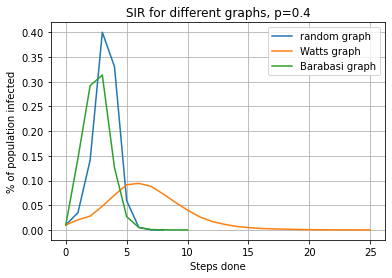

In [142]:
plt.plot(r_t3, label='random graph')
plt.plot(w_t3, label='Watts graph')
plt.plot(b_t3, label='Barabasi graph')
plt.title('SIR for different graphs, p=0.4')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

#### p4 = 0.7 also some not popular node for Barabasi, as 2 is starting node so it has big degree

In [144]:
p4 = 0.7

In [145]:
r_p4 = []
for i in range(1000):
    r_p4.append(SIR_walk(G_r, 78, p4))
    
w_p4 = []
for i in range(1000):
    w_p4.append(SIR_walk(G_w, 78, p4))
    
b_p4 = []
for i in range(1000):
    b_p4.append(SIR_walk(G_b, 78, p4))
    
r_t4 = my_counter(r_p4)
w_t4 = my_counter(w_p4)
b_t4 = my_counter(b_p4)

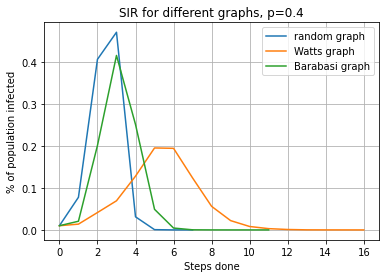

In [146]:
plt.plot(r_t4, label='random graph')
plt.plot(w_t4, label='Watts graph')
plt.plot(b_t4, label='Barabasi graph')
plt.title('SIR for different graphs, p=0.4')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

We can see that Barabasi case is postponed in time, but often it infects one of then popular nodes and then again they infect the rest of population

c) discussion

d) 20 different p, from random start

In [6]:
#QUESTION: 
def p_walk_but_different(G, p=0.5):
    '''SIR model with starting from random node
        returns how long it took to end phandemic and fraction of people that were infected
    '''
    
    tim = time.time()
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[p0] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    steps = 0
    nodes_moved = 0
    while(np.prod(node_status)==0):
        steps+=1
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            nodes_moved +=1
            if node_status[node]== 0:
                future_status[node] = -1
                for n in G.neighbors(node):
                    if(node_status[n] == 1 and random.random()<p):
                        future_status[n] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               
    #print(steps)

    return steps, sum(infection_progress)

In [153]:
p_walk_but_different(G_r, 0.1)

(2, 0.02)

In [156]:
ps = np.linspace(0.05, 0.95, 20)
MC_step=1000

In [7]:
def d_point(G, ps, MC_step=1000):
    sum_infected = []
    time_curation = []
    for p_single in ps:
        si = 0
        st = 0
        for i in range(MC_step):
            t1,s1 = p_walk_but_different(G, p_single)
            si+=s1
            st+=t1
        sum_infected.append(si/MC_step)
        time_curation.append(st/MC_step)
    return time_curation, sum_infected

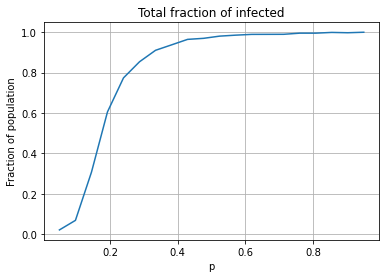

In [162]:
plt.plot(ps, sum_infected, label='Random')
plt.title('Total fraction of infected')
plt.ylabel('Fraction of population')
plt.xlabel('p')
plt.grid();

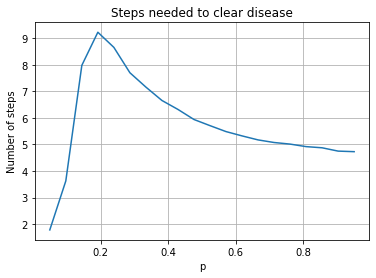

In [163]:
plt.plot(ps, time_curation, label='Random')
plt.title('Steps needed to clear disease')
plt.ylabel('Number of steps')
plt.xlabel('p')
plt.grid();

In [167]:
dwt, dws = d_point(G_w, ps, 1000)

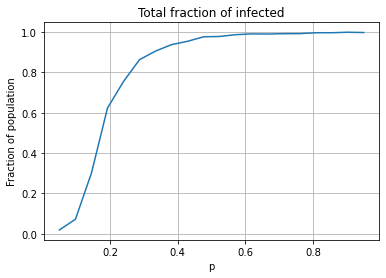

In [168]:
plt.plot(ps, dws, label='Random')
plt.title('Total fraction of infected')
plt.ylabel('Fraction of population')
plt.xlabel('p')
plt.grid();

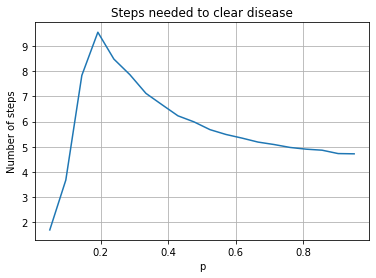

In [169]:
plt.plot(ps, dwt, label='Random')
plt.title('Steps needed to clear disease')
plt.ylabel('Number of steps')
plt.xlabel('p')
plt.grid();

In [175]:
drt, drs = d_point(G_r, ps, 1000)
dwt, dws = d_point(G_w, ps, 1000)
dbt, dbs = d_point(G_b, ps, 1000)

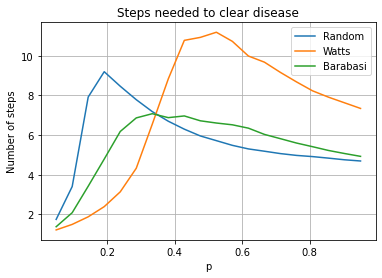

In [176]:
plt.plot(ps, drt, label='Random')
plt.plot(ps, dwt, label='Watts')
plt.plot(ps, dbt, label='Barabasi')
plt.title('Steps needed to clear disease')
plt.ylabel('Number of steps')
plt.xlabel('p')
plt.legend()
plt.grid();

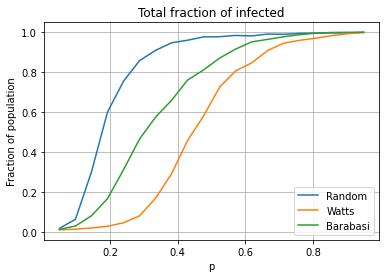

In [177]:
plt.plot(ps, drs, label='Random')
plt.plot(ps, dws, label='Watts')
plt.plot(ps, dbs, label='Barabasi')
plt.title('Total fraction of infected')
plt.ylabel('Fraction of population')
plt.xlabel('p')
plt.legend()
plt.grid();

e) some talking

f) animation for each graph of 30 nodes

In [55]:
def gif_walk(G, p=0.5, name_movie='Movie'):
    '''For a graph G starts from a random node SIR model
    creates gif of infection
    '''
    
    #blue - susceptible : 1
    #red - infected : 0
    #green - recovered : -1
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[p0] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    color_map = ['blue' for i in range(len(nodes))]
    color_map[p0] = 'red'
    nx.draw_spectral(G, node_color=color_map)
    
    plt.savefig(f'./task3_{0}.png', transparent = False, facecolor = 'white')
    
    nodes_moved = 0
    steps_stepped = 0
    while(np.prod(node_status)==0):
        steps_stepped+=1
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            #nodes_moved +=1
            if node_status[node]== 0:
                future_status[node] = -1
                color_map[node] = 'green'
                for n in G.neighbors(node):
                    if(node_status[n] == 1 and random.random()<p):
                        future_status[n] = 0
                        color_map[n] = 'red'
                        

        node_status = future_status.copy()
        #infection_progress.append(np.mean(node_status==0))
        nx.draw_spectral(G, node_color=color_map) #color for plot
        
        plt.savefig(f'./task3_{steps_stepped}.png', transparent = False, facecolor = 'white')
               
    #save frames and delete files
    frames = []
    for t in range(steps_stepped+1):
        frames.append(imageio.imread(f'./task3_{t}.png'))
        os.remove(f'./task3_{t}.png')
        
    #create gif
    imageio.mimsave('./'+name_movie+'.gif', frames, duration=1000)

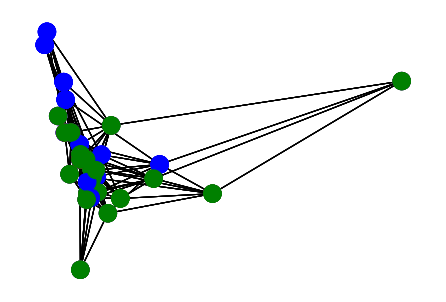

In [56]:
gif_walk(Ernyi(30, 150), 0.2, 'Random_pandemic');

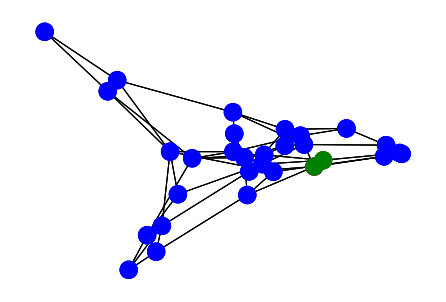

In [40]:
gif_walk(Watatz(30, 4, 0.5), 0.4, 'Watts_pandemic');

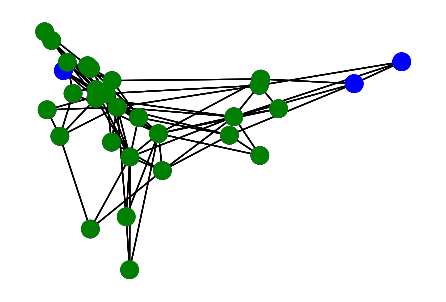

In [41]:
gif_walk(Barabasi(3, 3, 27), 0.5, 'Barabasi_pandemic');

## Task 3

In [44]:
def asynchronous_walk(G, p=0.5):
    '''For a graph G starts SIR model,
    in each steps chooses random node and proceeds with SIR things (infect or recover), repeats number of nodes times
    '''
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[p0] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    
    nodes_moved = 0
    while(np.prod(node_status)==0):
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        
        for _ in range(len(nodes)):
            node = random.choice(nodes)
            if node_status[node]== 0:
                future_status[node] = -1
                for n in G.neighbors(node):
                    if(node_status[n] == 1 and random.random()<p):
                        future_status[n] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               


    return infection_progress 

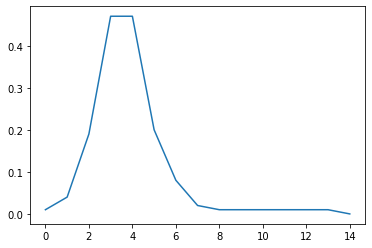

In [46]:
at = asynchronous_walk(G_r)
plt.plot(at)

## Lattice things

1 2 3 4

5 6 7 8

9 10 11 12

13 14 15 16

In [71]:
def gif_latice(G, p=0.5, name_movie='Movie'):
    '''For a graph G starts from a random node SIR model
    creates gif of infection
    '''
    
    #blue - susceptible : 1
    #red - infected : 0
    #green - recovered : -1
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    color_map = ['blue' for i in range(len(nodes))]
    color_map[nodes.index(p0)] = 'red'
    nx.draw_spectral(G, node_color=color_map)
    
    plt.savefig(f'./task3_{0}.png', transparent = False, facecolor = 'white')
    
    nodes_moved = 0
    steps_stepped = 0
    while(np.prod(node_status)==0):
        steps_stepped+=1
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            m_ind = nodes.index(node)
            #nodes_moved +=1
            if node_status[m_ind]== 0:
                future_status[m_ind] = -1
                color_map[m_ind] = 'green'
                for n in G.neighbors(node):
                    n_index = nodes.index(n)
                    if(node_status[n_index] == 1 and random.random()<p):
                        future_status[n_index] = 0
                        color_map[n_index] = 'red'
                        

        node_status = future_status.copy()
        #infection_progress.append(np.mean(node_status==0))
        nx.draw_spectral(G, node_color=color_map) #color for plot
        
        plt.savefig(f'./task3_{steps_stepped}.png', transparent = False, facecolor = 'white')
               
    #save frames and delete files
    frames = []
    for t in range(steps_stepped+1):
        frames.append(imageio.imread(f'./task3_{t}.png'))
        os.remove(f'./task3_{t}.png')
        
    #create gif
    imageio.mimsave('./'+name_movie+'.gif', frames, duration=1000)

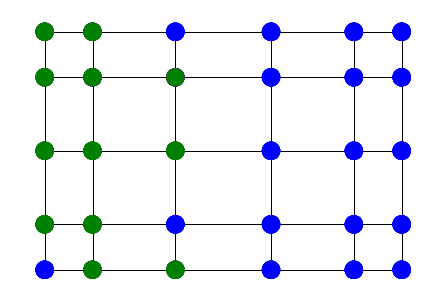

In [73]:
gif_latice(nx.grid_2d_graph(5,6), 0.5,'g')